In [2]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [4]:
import requests

from io import StringIO

In [5]:
url = 'https://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv'

source = requests.get(url).text

poll_data = StringIO(source)

poll_df = pd.read_csv(poll_data)

poll_df.info

<bound method DataFrame.info of                       Pollster  Start Date    End Date  Entry Date/Time (ET)  \
0                Insights West  2016-11-04  2016-11-07  2016-11-08T12:16:30Z   
1                Insights West  2016-11-04  2016-11-07  2016-11-08T12:16:30Z   
2                Insights West  2016-11-04  2016-11-07  2016-11-08T12:16:30Z   
3                Insights West  2016-11-04  2016-11-07  2016-11-08T12:16:30Z   
4                     IBD/TIPP  2016-11-04  2016-11-07  2016-11-08T12:10:06Z   
5             YouGov/Economist  2016-11-04  2016-11-07  2016-11-07T21:25:46Z   
6             YouGov/Economist  2016-11-04  2016-11-07  2016-11-07T21:25:46Z   
7             YouGov/Economist  2016-11-04  2016-11-07  2016-11-07T21:25:46Z   
8             YouGov/Economist  2016-11-04  2016-11-07  2016-11-07T21:25:46Z   
9     Lucid/The Times-Picayune  2016-11-04  2016-11-06  2016-11-07T15:43:26Z   
10            Bloomberg/Selzer  2016-11-04  2016-11-06  2016-11-07T12:18:47Z   
11      

In [14]:
poll_df.drop(['Pollster URL'], axis = 1,inplace = True)

In [17]:
poll_df.drop(['Source URL'], axis = 1,inplace = True)

In [19]:
poll_df.shape

(1522, 15)

In [20]:
poll_df.info

<bound method DataFrame.info of                       Pollster  Start Date    End Date  Entry Date/Time (ET)  \
0                Insights West  2016-11-04  2016-11-07  2016-11-08T12:16:30Z   
1                Insights West  2016-11-04  2016-11-07  2016-11-08T12:16:30Z   
2                Insights West  2016-11-04  2016-11-07  2016-11-08T12:16:30Z   
3                Insights West  2016-11-04  2016-11-07  2016-11-08T12:16:30Z   
4                     IBD/TIPP  2016-11-04  2016-11-07  2016-11-08T12:10:06Z   
5             YouGov/Economist  2016-11-04  2016-11-07  2016-11-07T21:25:46Z   
6             YouGov/Economist  2016-11-04  2016-11-07  2016-11-07T21:25:46Z   
7             YouGov/Economist  2016-11-04  2016-11-07  2016-11-07T21:25:46Z   
8             YouGov/Economist  2016-11-04  2016-11-07  2016-11-07T21:25:46Z   
9     Lucid/The Times-Picayune  2016-11-04  2016-11-06  2016-11-07T15:43:26Z   
10            Bloomberg/Selzer  2016-11-04  2016-11-06  2016-11-07T12:18:47Z   
11      

In [21]:
#Adding a columns
poll_df = poll_df.groupby(['Start Date'], as_index = False).mean()

poll_df.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0


In [22]:
#Adding a Column

poll_df['Difference']=(poll_df.Trump - poll_df.Clinton)/100

poll_df.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,-0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,-0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,-0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,-0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,-0.1425


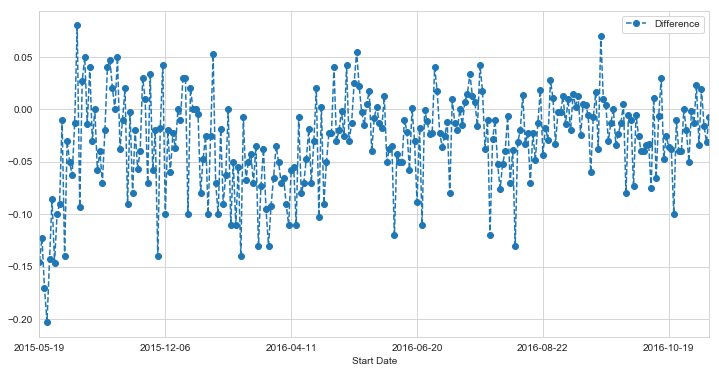

In [23]:
poll_df.plot('Start Date','Difference', figsize=(12,6),
             marker = 'o', linestyle ='--')

#Difference with negative number is favorable in Clintons

In [25]:
#Why Trump votes are so strong in these particular date
poll_df['Difference'].max()

0.08

In [41]:
poll_df.Difference.idxmax()

15

In [42]:
poll_df.ix[poll_df.Diffrence.idxmax()]
#Output --> period of 2015/08/21 Trump has the most voting over Clinton

/Users/Brenda-Liu-Life/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Start Date                2015-08-21
Number of Observations          3567
Trump                             54
Clinton                           46
Other                            NaN
Undecided                        NaN
Question Iteration                 1
Difference                      0.08
Name: 15, dtype: object

In [44]:
poll_df.ix[poll_df.Difference.idxmin()]
#Output --> period of 2015/06/26 Trump has the most voting over Clinton

/Users/Brenda-Liu-Life/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Start Date                2015-06-26
Number of Observations           890
Trump                          36.75
Clinton                           57
Other                              6
Undecided                          0
Question Iteration                 1
Difference                   -0.2025
Name: 3, dtype: object

In [40]:
#EXAMPLE of Max and min value
url = 'https://stackoverflow.com/questions/39964558/pandas-max-value-index'
df = pd.DataFrame({'favcount':[1,2,3], 'sn':['a','b','c']})

#print (df)
#print (df.favcount.idxmax())

print (df.ix[df.favcount.idxmax()])

#print (df.ix[df.favcount.idxmax(), 'sn'])


favcount    3
sn          c
Name: 2, dtype: object


/Users/Brenda-Liu-Life/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In order to find where to set the x limits for the figure we need to find out where the index for the month of October in 2012 is. Here's a simple for loop to find that row. Note, the string format of the date makes this difficult to do without using a lambda expression or a map.

In [46]:
# Set row count and xlimit list
row_in = 0
xlimint = []

# Cycle through dates until 2015-06 is found, then print row index
#For everyday in the start date column
for date in poll_df['Start Date']:
    #If the first 7 terms of the start equals to 2015-06
    if date[0:7] == '2015-06':
        #Go ahead and append of the xlimit -> row index
        xlimit.append(row_in)
        #Add one to the x limit to have the count going
        row_in +=1
        #If it didn't find anything
        # add one to the x index
        else:
            row_in +=1
print min(xlimit)
print max(xlimit)

SyntaxError: invalid syntax (<ipython-input-46-5c3c6b88d3d7>, line 16)

In [62]:
row_in = 0
xlimit = []

# Cycle through dates until 2012-10 is found, then print row index
for date in poll_df['Start Date']:
    if date[0:7] == '2016-09':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print(min(xlimit))
print(max(xlimit))

209
231


In [63]:
row_in = 0
xlimit = []

# Cycle through dates until 2012-10 is found, then print row index
for date in poll_df['Start Date']:
    if date[0:7] == '2016-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print(min(xlimit))
print(max(xlimit))

232
262


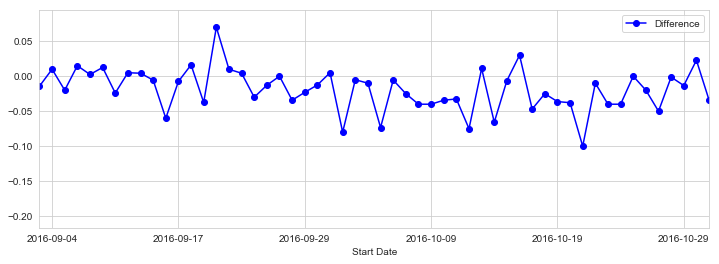

In [64]:
# Start with original figure
# 2016 United States presidential debates between 2016-09 to 2016-10
poll_df.plot(x='Start Date',y='Difference',
            figsize=(12,4),
            marker='o',linestyle = '-',
            color = 'blue', 
            xlim=(209,262))

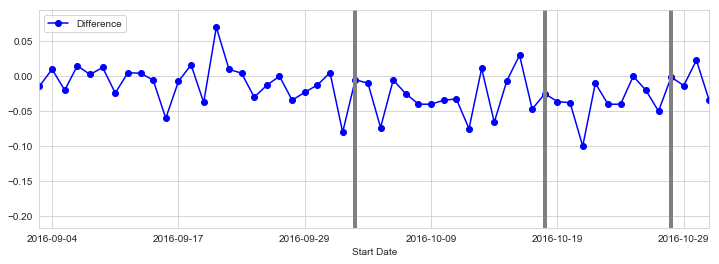

In [66]:
poll_df.plot(x='Start Date',y='Difference',
            figsize=(12,4),
            marker='o',linestyle = '-',
            color = 'blue', 
            xlim=(209,262))
#Vertical Line = 2016 United States presidential debates

#1	September 26, 2016	Lester Holt
plt.axvline(x=209+25,linewidth = 4, color = 'grey')
#2	October 9, 2016	Martha Raddatz Anderson Cooper
plt.axvline(x=209+40,linewidth = 4, color = 'grey')
#3	October 19, 2016	Chris Wallace
plt.axvline(x=209+50,linewidth = 4, color = 'grey')
#Output showing polls had favor Trump before the first debate,
#Polls favor Clinton after almost every debate

In [67]:
#https://cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com/bulk-downloads/index.html
donor_df = pd.read_csv('Ele')

'/Users/Brenda-Liu-Life'